<a href="https://colab.research.google.com/github/jieunlee-hi/Portfolio/blob/main/%EC%97%85%EC%A2%85%EB%B3%84_%EB%84%A4%EC%9D%B4%EB%B2%84%EC%A6%9D%EC%8B%9C%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 네이버 금융 개별종목 수집
* FinanceDataReader를 통해 수집했던 데이터를 네이버 증권 웹 페이지를 통해 직접 수집합니다.


### Keyword

* html 파일 읽어오기
    * pd.read_html(url, encoding="cp949")

* 결측 데이터 제거하기(axis 0:행, 1:열)
    * table[0].dropna()

* 데이터 프레임 합치기
    * pd.concat([df1, df2, df3])

* 중복데이터 제거
    * df.drop_duplicates()

* 과학적 기수법
    * 1.210000e+02 => 121

* 날짜 column의 첫 row값 확인
    * date = df.iloc[0]["날짜"]

* 파일로 저장하기 
    * df.to_csv(file_name, index=False)

* 파일 읽어오기
    * pd.read_csv(file_name)

In [1]:
# 라이브러리 로드 : pandas, matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
font_family = get_font_family()

In [4]:
# 사용가능한 폰트 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
# 그래프 스타일 설정
plt.style.use("seaborn")

# 폰트설정
plt.rc("font", family=font_family)

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0, flags=flags)


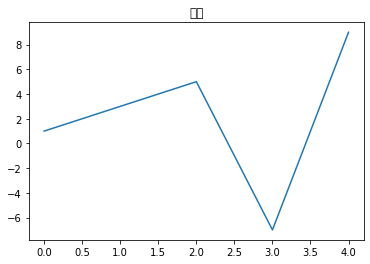

In [6]:
# 한글폰트가 제대로 동작하는지 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

## 모든 업종코드 추출  

In [7]:
# -*- coding:utf-8 -*-
import re
import time
import ssl
context = ssl._create_unverified_context()
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen

#page = requests.get("https://finance.naver.com/sise/sise_group.naver?type=upjong",context=context)
result = urlopen("https://finance.naver.com/sise/sise_group.naver?type=upjong", context=context)
soup = bs(result.read(), "html.parser")

code_num=[]
code_name=[]
try :
    for td in soup('td'):  # td 안의
        for a in td('a'):  # a 태그 중에서
            name = a.get_text()  # 업종명 데이터 추출
            #print(name)
            time.sleep(0.2)
            cod = re.search('/sise/.*', a['href']).group(0)  # 필요부분추출후 그룹핑
            # 업종 url
            cod = str(cod)
            cod = re.sub(r'[^0-9]', '', cod)
            #
            #print(p)
            code_num.append(cod)
            code_name.append(name)
except:
    pass
#딕셔너리로 변환
dic = dict(zip(code_name, code_num))            
print(dic)

{'기타금융': '319', '담배': '275', '식품과기본식료품소매': '302', '전기제품': '283', '종이와목재': '318', '사무용전자제품': '338', '컴퓨터와주변기기': '293', '해운사': '323', '비철금속': '322', '화학': '272', '우주항공과국방': '284', '부동산': '280', '카드': '337', '무역회사와판매업체': '334', '판매업체': '265', '창업투자': '277', '에너지장비및서비스': '295', '운송인프라': '296', '백화점과일반상점': '264', '건강관리장비와용품': '281', '핸드셋': '292', '디스플레이장비및부품': '269', '가구': '303', '건축제품': '320', '자동차부품': '270', '생명과학도구및서비스': '262', '가스유틸리티': '312', '포장재': '311', '가정용품': '297', '식품': '268', '자동차': '273', '항공화물운송과물류': '326', '조선': '291', '복합유틸리티': '331', '소프트웨어': '287', '건축자재': '289', '상업서비스와공급품': '324', '무선통신서비스': '333', '기계': '299', '은행': '301', '기타': '25', '문구류': '332', '증권': '321', '생물공학': '286', '석유와가스': '313', '다각화된소비자서비스': '339', '생명보험': '330', '건강관리기술': '288', '항공사': '305', '다각화된통신서비스': '336', '음료': '309', '레저용장비와제품': '271', '교육서비스': '290', '전기장비': '306', '화장품': '266', '호텔,레스토랑,레저': '317', '복합기업': '276', '도로와철도운송': '329', 'IT서비스': '267', '인터넷과카탈로그소매': '308', '섬유,의류,신발,호화품': '274', '출판'

### read_html을 통해 url에 해당하는 업종 데이터 수집

In [111]:
#https://pbes.tistory.com/entry/%EC%A3%BC%EC%9A%94-%EC%A6%9D%EA%B6%8C%EC%82%AC%EA%B0%80-%EB%BD%91%EC%9D%80-2022%EB%85%84-%EC%9C%A0%EB%A7%9D-%EC%97%85%EC%A2%85-%EB%B0%8F-%EC%A2%85%EB%AA%A9
import time
data_frame=[dic['반도체와반도체장비'],dic['자동차'],dic['자동차부품'],dic['방송과엔터테인먼트']]

url_item=[]
for i in data_frame:
    url = "https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=" + str(i)
    print(url)
    time.sleep(0.3)
    
    # read_html을 통해 해당 업종/테마를 수집합니다.
    table = pd.read_html(url, encoding="cp949")
    url_item.append(table)
print(url_item)
print("수집완료")

https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=278
https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=273
https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=270
https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=285
[[         업종명    전일대비 전일대비 등락현황                   등락그래프
         업종명    전일대비        전체    상승   보합     하락 등락그래프
0        NaN     NaN       NaN   NaN  NaN    NaN   NaN
1  반도체와반도체장비  -2.20%     134.0  23.0  7.0  104.0   59%
2        NaN     NaN       NaN   NaN  NaN    NaN   NaN
3        NaN     NaN       NaN   NaN  NaN    NaN   NaN,      0      1          2        3          4       5
0  거래량   매수호가   거래대금(백만)  시가총액(억)    영업이익(억)  PER(배)
1   시가   매도호가      전일거래량  자산총계(억)    영업이익증가율  ROE(%)
2   고가  매수총잔량      외국인비율  부채총계(억)   당기순이익(억)  ROA(%)
3   저가  매도총잔량  상장주식수(천주)   매출액(억)   주당순이익(원)  PBR(배)
4  NaN    NaN        NaN   매출액증가율  보통주배당금(원)  유보율(%),            종목명      현재가     전일비     등락률     매수호가    

### 업종 데이터 갯수확인

In [100]:
np.shape(url_item)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(2, 3)

### 원하는 데이터의 위치확인
    *  수집해야할 데이터들은 table[0~78][2]에 존재한다

In [112]:
list2 = sum(url_item, [])
print(list2)

[         업종명    전일대비 전일대비 등락현황                   등락그래프
         업종명    전일대비        전체    상승   보합     하락 등락그래프
0        NaN     NaN       NaN   NaN  NaN    NaN   NaN
1  반도체와반도체장비  -2.20%     134.0  23.0  7.0  104.0   59%
2        NaN     NaN       NaN   NaN  NaN    NaN   NaN
3        NaN     NaN       NaN   NaN  NaN    NaN   NaN,      0      1          2        3          4       5
0  거래량   매수호가   거래대금(백만)  시가총액(억)    영업이익(억)  PER(배)
1   시가   매도호가      전일거래량  자산총계(억)    영업이익증가율  ROE(%)
2   고가  매수총잔량      외국인비율  부채총계(억)   당기순이익(억)  ROA(%)
3   저가  매도총잔량  상장주식수(천주)   매출액(억)   주당순이익(원)  PBR(배)
4  NaN    NaN        NaN   매출액증가율  보통주배당금(원)  유보율(%),            종목명      현재가     전일비     등락률     매수호가     매도호가       거래량    거래대금  \
0          NaN      NaN     NaN     NaN      NaN      NaN       NaN     NaN   
1       바른전자 *   4855.0   320.0  +7.06%   4855.0   4900.0  252270.0  1202.0   
2      아진엑스텍 *  11400.0   600.0  +5.56%  11400.0  11450.0  451632.0  5016.0   
3     로체시스템즈 *   6800.0   350.0  

In [114]:
#list2 2 5
list2[11]

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,토론실,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,큐브엔터 *,15300.0,1050.0,+7.37%,15250.0,15300.0,271426.0,4050.0,55857.0,NaN,NaN,NaN
2,쇼박스 *,5160.0,230.0,+4.67%,5150.0,5160.0,1339566.0,6751.0,672807.0,NaN,NaN,NaN
3,티비씨 *,1250.0,35.0,+2.88%,1250.0,1255.0,876055.0,1088.0,777705.0,NaN,NaN,NaN
4,알비더블유 *,16750.0,250.0,+1.52%,16700.0,16750.0,30131.0,494.0,24037.0,NaN,NaN,NaN
5,SBS콘텐츠허브 *,6630.0,90.0,+1.38%,6590.0,6630.0,8089.0,52.0,6669.0,NaN,NaN,NaN
6,iMBC *,3185.0,40.0,+1.27%,3125.0,3185.0,48726.0,151.0,115387.0,NaN,NaN,NaN
7,콘텐트리중앙,41200.0,300.0,+0.73%,41150.0,41200.0,368803.0,15130.0,981204.0,NaN,NaN,NaN
8,SM Life Design *,2255.0,5.0,+0.22%,2250.0,2255.0,269271.0,598.0,293994.0,NaN,NaN,NaN
9,초록뱀컴퍼니 *,719.0,0.0,0.00%,718.0,719.0,193016.0,136.0,275394.0,NaN,NaN,NaN


In [117]:
np.shape(list2)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(12,)

In [118]:
# dropna를 통해 결측치를 제거합니다. 전부 결측치 일시 제거 (how='all') 
tables = []
for i in range(2, 11, 3):
  data = list2[i]
  #print(data)
  #전부 결측치 일때 제거 (how='all') 
  data = data.dropna(how="all").dropna(axis=1, how="all")
  tables.append(data)

  finance_data = pd.concat(tables, axis=0, ignore_index=False)
print(finance_data)

           종목명      현재가    전일비      등락률     매수호가     매도호가        거래량    거래대금  \
1       바른전자 *   4855.0  320.0   +7.06%   4855.0   4900.0   252270.0  1202.0   
2      아진엑스텍 *  11400.0  600.0   +5.56%  11400.0  11450.0   451632.0  5016.0   
3     로체시스템즈 *   6800.0  350.0   +5.43%   6790.0   6800.0   995971.0  6635.0   
4        엑시콘 *  10200.0  420.0   +4.29%  10200.0  10250.0    75941.0   759.0   
5      바이옵트로 *   7000.0  200.0   +2.94%   7000.0   7010.0   156371.0  1064.0   
..         ...      ...    ...      ...      ...      ...        ...     ...   
137     현대공업 *   7580.0  240.0   -3.07%   7580.0   7590.0   183030.0  1371.0   
138      대유플러스    945.0   30.0   -3.08%    945.0    948.0   464630.0   436.0   
139     한일단조 *   3160.0  120.0   -3.66%   3160.0   3165.0   776943.0  2458.0   
140  우리산업홀딩스 *   5450.0  210.0   -3.71%   5450.0   5480.0   179615.0   978.0   
141      에스엠벡셀   2335.0  280.0  -10.71%   2335.0   2340.0  1655158.0  4058.0   

         전일거래량  
1      97377.0  
2    

In [157]:
import openpyxl
import xlrd

# 엑셀파일로 저장하기
writer = pd.ExcelWriter('finance_0916.xlsx')
finance_data.to_excel(writer, sheet_name='Sheet1', index=False, header=False, na_rep=' ',encoding='utf-8')  # 엑셀로 저장
writer.save()

### 파생변수 만들기

In [119]:
# datetime을 이용하여 조회한 날짜를 DataFrame에 기록합니다.
import datetime
today = datetime.datetime.today()
today = today.strftime("%Y-%m-%d")
today

'2022-09-14'

In [120]:
# 일자별로 데이터가 다르니 조회일자를 추가해 줍니다.
finance_data["조회일자"] = today
# 조회일자가 추가되었는지 확인해 봅니다.
finance_data.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,바른전자 *,4855.0,320.0,+7.06%,4855.0,4900.0,252270.0,1202.0,97377.0,2022-09-14
2,아진엑스텍 *,11400.0,600.0,+5.56%,11400.0,11450.0,451632.0,5016.0,154118.0,2022-09-14
3,로체시스템즈 *,6800.0,350.0,+5.43%,6790.0,6800.0,995971.0,6635.0,384120.0,2022-09-14
4,엑시콘 *,10200.0,420.0,+4.29%,10200.0,10250.0,75941.0,759.0,40709.0,2022-09-14
5,바이옵트로 *,7000.0,200.0,+2.94%,7000.0,7010.0,156371.0,1064.0,186064.0,2022-09-14


### 거래량과 거래대금 시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48652 missing from current font.
  font.set_

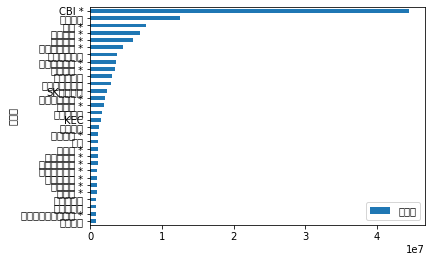

In [121]:
# bar chart로 그립니다.
# set_index를 해주면 plot시에 y axis label로 그려집니다.
# 거래량 상위 30개의 종목을 시각화 합니다.
finance_temp = finance_data[["종목명", "거래량"]].sort_values("거래량")
finance_temp.set_index("종목명").tail(30).plot.barh()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49556 missing from current font.
  font.set_

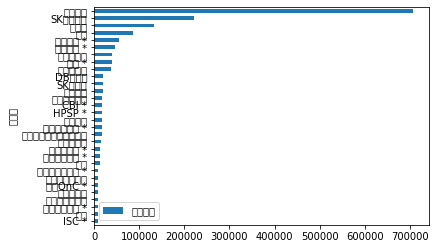

In [122]:
# 거래대금의 bar chart를 시각화 합니다.
finance_temp = finance_data[["종목명", "거래대금"]].set_index("종목명")
finance_temp = finance_temp.sort_values("거래대금").tail(30)
finance_temp.plot.barh()

## 종목코드 병합

### 종목명을 통해 미리 수집해 두었던 krx 전체 상장 종목 목록을 가져오거나 수집해서 데이터를 병합합니다.

In [151]:
# 기존 종목명에는 * 표시가 있기 때문에 * 문자를 제거해서 "종목명_전처리"라는 새로운 컬럼에 담아줍니다.
finance_data["종목명_전처리"] = finance_data["종목명"].str.replace("*", "")
finance_data["종목명_전처리"] = finance_data["종목명_전처리"].str.strip()

# finance_data 변수에 담긴 데이터프레임을 확인합니다.
finance_data[["종목명", "종목명_전처리"]].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,종목명,종목명_전처리
1,바른전자 *,바른전자
2,아진엑스텍 *,아진엑스텍
3,로체시스템즈 *,로체시스템즈
4,엑시콘 *,엑시콘
5,바이옵트로 *,바이옵트로


In [124]:
!pip --trusted-host pypi.org --trusted-host files.pythonhosted.org install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [125]:
df_code=pd.read_csv('/content/drive/MyDrive/naver_finance0914.csv',encoding='cp949')

In [126]:
df_code.head()

,업종명,소속종목수,종목명,종목코드
0,우주항공과국방,16,에이트원,230980
1,우주항공과국방,16,한화에어로스페이스,012450
2,우주항공과국방,16,휴니드,005870
3,우주항공과국방,16,한화시스템,272210
4,우주항공과국방,16,아스트,067390


merge 를 통한 종목코드 만들기

In [127]:
# "Symbol", "Name" 만 사용하기 위해 따로 df_item_code_name 변수로 가져옵니다.
# 연결할 key 값으로 사용할 컬럼명을 같게 만들어 주면 전처리가 줄어듭니다.
# Symbol => "종목코드", Name => "종목명_전처리" 로 만들어주면 
# "종목명_전처리" 를 키값으로 합쳤을 때 전처리가 줄어듭니다.
code_name = df_code[["종목코드","종목명"]]
code_name.columns = ["종목코드", "종목명_전처리"]
code_name.head()

,종목코드,종목명_전처리
0,230980,에이트원
1,012450,한화에어로스페이스
2,005870,휴니드
3,272210,한화시스템
4,067390,아스트


In [128]:
# 종목갯수를 확인하기 위해 df의 행과 열의 수를 출력합니다.
finance_data.shape

(284, 11)

In [129]:
# 종목코드를 만들어주기 위해 종목명_전처리 컬럼을 기준으로 df_item_code_name 데이터프레임과 병합합니다.
# df
df = finance_data.merge(code_name, on="종목명_전처리", how='left')
df.shape

(284, 12)

In [130]:
df

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,바른전자 *,4855.0,320.0,+7.06%,4855.0,4900.0,252270.0,1202.0,97377.0,2022-09-14,바른전자,064520
1,아진엑스텍 *,11400.0,600.0,+5.56%,11400.0,11450.0,451632.0,5016.0,154118.0,2022-09-14,아진엑스텍,059120
2,로체시스템즈 *,6800.0,350.0,+5.43%,6790.0,6800.0,995971.0,6635.0,384120.0,2022-09-14,로체시스템즈,071280
3,엑시콘 *,10200.0,420.0,+4.29%,10200.0,10250.0,75941.0,759.0,40709.0,2022-09-14,엑시콘,092870
4,바이옵트로 *,7000.0,200.0,+2.94%,7000.0,7010.0,156371.0,1064.0,186064.0,2022-09-14,바이옵트로,222160
...,...,...,...,...,...,...,...,...,...,...,...,...
279,현대공업 *,7580.0,240.0,-3.07%,7580.0,7590.0,183030.0,1371.0,261859.0,2022-09-14,현대공업,170030
280,대유플러스,945.0,30.0,-3.08%,945.0,948.0,464630.0,436.0,254761.0,2022-09-14,대유플러스,NaN
281,한일단조 *,3160.0,120.0,-3.66%,3160.0,3165.0,776943.0,2458.0,671833.0,2022-09-14,한일단조,024740
282,우리산업홀딩스 *,5450.0,210.0,-3.71%,5450.0,5480.0,179615.0,978.0,271049.0,2022-09-14,우리산업홀딩스,072470


종목상세정보 수집

In [131]:
# 전체 종목을 수집하기 전에 일부 종목을 먼저 수집합니다.
item_code = "272210"
item_name = "한화시스템"

In [132]:
# 종목상세정보를 위한 url을 확보합니다.
# item_code에는 종목코드 수집시에 마지막에 수집된 데이터가 남아있습니다.
item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"

item_url

'https://finance.naver.com/item/main.nhn?code=272210'

In [133]:
# read_html을 이용해 데이터를 수집합니다.
table_data = pd.read_html(item_url, encoding="cp949")
print(table_data)

[                    0                                        1  \
0  전일  14,800  14,800  고가  14,85014,850  (상한가  19,20019,200  )   
1    시가  14,40014,400        저가  14,30014,300  (하한가  10,400  )   

                        2  
0   거래량  494,949  494,949  
1  거래대금  7,218  7,218  백만  ,      매도상위      거래량    매수상위      거개량
0     NaN      NaN     NaN      NaN
1    키움증권  66695.0    키움증권  64995.0
2  신한금융투자  54425.0      삼성  52166.0
3    한국증권  49388.0    한국증권  45273.0
4  NH투자증권  47482.0  신한금융투자  43461.0
5      삼성  47100.0    KB증권  32057.0
6  외국계추정합      0.0  +16472  16472.0,       날짜       종가      전일비       외국인        기관
0    NaN      NaN      NaN       NaN       NaN
1  09/14  14750.0   하향  50  -53182.0   66277.0
2  09/13  14800.0  하향  150   50724.0  -35460.0
3  09/08  14950.0   하향  50  -38467.0  123755.0
4  09/07  15000.0  하향  450 -352899.0  -44561.0
5  09/06  15450.0   상향  50  -31645.0  -11388.0
6  09/05  15400.0  상향  250  106348.0   93317.0
7    NaN      NaN      NaN       NaN       NaN,   

In [134]:
# 제대로 수집이 되었는지 확인합니다.
table_data[3].iloc[:, [0, -1]]

,주요재무정보,최근 분기 실적
,주요재무정보,2022.09(E)
,주요재무정보,IFRS연결
0,매출액,5994.00
1,영업이익,350.00
2,당기순이익,210.00
3,영업이익률,5.83
4,순이익률,3.50
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN


In [135]:
# tables의 원소값을 확인하여 원하는 데이터가 어디에 있는지 확인합니다.
pd.concat([table_data[8], table_data[9]]).set_index(0).T

,PERlEPS(2022.06),추정PERlEPS,PBRlBPS (2022.06),배당수익률l2021.12,동일업종 PER,동일업종 등락률
1,150.51배 l 98원,90.00배 l 163원,"1.27배 l 11,577원",1.09%,43.79배,-0.15%


컬럼명과 값 형태로 되어 있는 테이블만 사용


In [136]:
# 수집한 정보를 item_info에 list 형태로 관리합니다.
item_info = []

In [137]:
# 가장 최근의 주요재무정보를 가져와서 item_info 라는 변수에 담습니다.
finance_info = table_data[3].iloc[:, [0, -1]]
finance_info.columns = [0, 1]
item_info.append(finance_info)

In [138]:
# tables을 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출해 
# 위에서 만든 item_info 에 리스트 형태로 추가합니다.
for t in table_data:
    if t.shape[1] == 2:
        item_info.append(t)

In [139]:
# 위에서 만든 리스트의 값을 확인합니다.
item_info

[            0        1
 0         매출액  5994.00
 1        영업이익   350.00
 2       당기순이익   210.00
 3       영업이익률     5.83
 4        순이익률     3.50
 5   ROE(지배주주)      NaN
 6        부채비율      NaN
 7        당좌비율      NaN
 8         유보율      NaN
 9      EPS(원)   149.00
 10     PER(배)    99.50
 11     BPS(원)      NaN
 12     PBR(배)      NaN
 13   주당배당금(원)      NaN
 14   시가배당률(%)      NaN
 15    배당성향(%)      NaN,           0              1
 0      시가총액  2조  7,866  억원
 1    시가총액순위       코스피 105위
 2     상장주식수      188919389
 3  액면가l매매단위  5,000원  l  1주,              0          1
 0  외국인한도주식수(A)  188919389
 1  외국인보유주식수(B)    5480112
 2  외국인소진율(B/A)      2.90%,            0                  1
 0  투자의견l목표주가  4.20매수  l  23,000
 1   52주최고l최저  19,450  l  11,950,                    0                  1
 0   PERlEPS(2022.06)    150.51배  l  98원
 1          추정PERlEPS    90.00배  l  163원
 2  PBRlBPS (2022.06)  1.27배  l  11,577원
 3      배당수익률l2021.12              1.09%,           0       1
 0  동일업종 PER  43.79

In [140]:
# item_info[0] 의 컬럼명을 봅니다. 같은 컬럼이 아니면 행끼리 합칠 수 없습니다.
item_info[2]

,0,1
0,외국인한도주식수(A),188919389
1,외국인보유주식수(B),5480112
2,외국인소진율(B/A),2.90%


In [141]:
# concat을 이용하여 item_info를 하나의 DataFrame으로 만듭니다.
df_item = pd.concat(item_info)
df_item

,0,1
0,매출액,5994.0
1,영업이익,350.0
2,당기순이익,210.0
3,영업이익률,5.83
4,순이익률,3.5
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),149.0


In [142]:
# concat을 이용하여 item_info를 하나의 DataFrame으로 만듭니다.
df_item = pd.concat(item_info)
df_item

,0,1
0,매출액,5994.0
1,영업이익,350.0
2,당기순이익,210.0
3,영업이익률,5.83
4,순이익률,3.5
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),149.0


transpose를 통해 행과 열의 위치를 변경

In [143]:
df_item.set_index(0)

,1
0,
매출액,5994.0
영업이익,350.0
당기순이익,210.0
영업이익률,5.83
순이익률,3.5
ROE(지배주주),NaN
부채비율,NaN
당좌비율,NaN
유보율,NaN


In [144]:
# transpose는 .transpose() 혹은  .T 로 사용해 보실 수 있습니다.
df_item.set_index(0).T

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2022.06),추정PERlEPS,PBRlBPS (2022.06),배당수익률l2021.12,동일업종 PER,동일업종 등락률
1,5994.0,350.0,210.0,5.83,3.5,NaN,NaN,NaN,NaN,149.0,...,5480112,2.90%,"4.20매수 l 23,000","19,450 l 11,950",150.51배 l 98원,90.00배 l 163원,"1.27배 l 11,577원",1.09%,43.79배,-0.15%


In [145]:
# 위에서 한 종목코드에 대해 개별 주가 정보를 얻는 방법을 확인하였으니,
# 같은 방법으로 모든 종목코드의 주가 정보를 추출합니다.
# 무리한 네트워크 요청은 서버에 부담을 줍니다. 
# sleep을 사용해서 서버에 무리한 요청을 하지 않습니다.
import time

def get_item_info(item_code):
    
    item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
    tables = pd.read_html(item_url, encoding="cp949")
    
    item_info = []
    finance_info = tables[3].iloc[:, [0, -1]]
    finance_info.columns = [0, 1]
    item_info.append(finance_info)
    
    for t in tables:
        if t.shape[1] == 2:
            item_info.append(t)
            
    df_item = pd.concat(item_info)
    df_item = df_item.set_index(0).T
    time.sleep(0.1)
    return df_item

In [146]:
df["종목코드"]

0      064520
1      059120
2      071280
3      092870
4      222160
        ...  
279    170030
280       NaN
281    024740
282    072470
283       NaN
Name: 종목코드, Length: 284, dtype: object

In [147]:
# 데이터프레임 형태로 종목정보를 수집해 왔습니다.
# 다른 종목도 아래와 같은 형태로 모아서 concat 으로 연결해 준다면 
# 종목끼리 정보를 비교해 볼 수 있을것 같습니다.
get_item_info(item_code)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2022.06),추정PERlEPS,PBRlBPS (2022.06),배당수익률l2021.12,동일업종 PER,동일업종 등락률
1,5994.0,350.0,210.0,5.83,3.5,NaN,NaN,NaN,NaN,149.0,...,5480112,2.90%,"4.20매수 l 23,000","19,450 l 11,950",150.51배 l 98원,90.00배 l 163원,"1.27배 l 11,577원",1.09%,43.79배,-0.15%


In [148]:
# tqdm은 total quality data management의 약자입니다.
# tqdm.auto 에서 tqdm을 불러옵니다.
from tqdm.auto import tqdm
tqdm.pandas()

In [149]:
# DataFrame의 종목코드 column에 있는 종목코드들값을 get_item_info 함수에 적용되어
# result에 series형태로 저장됩니다.
result = df["종목코드"].progress_apply(get_item_info)

  0%|          | 0/284 [00:00<?, ?it/s]

In [152]:
result

0      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
1      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
2      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
3      0    매출액  영업이익 당기순이익  영업이익률 순이익률 ROE(지배주주) 부채비...
4      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
                             ...                        
279    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
280    0 52주최고l최저   시가총액 상장주식수 52주최고l최저
1        l  0...
281    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
282    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
283    0 52주최고l최저   시가총액 상장주식수 52주최고l최저
1        l  0...
Name: 종목코드, Length: 284, dtype: object

## concat 을 통한 데이터 프레임 합치기
    *수집한 종목마다의 정보를 하나의 데이터프레임으로 만듭니다.

In [155]:
# result를 list로 만들고 concat을 통해 DataFrame으로 만듭니다.
# concat으로 데이터프레임을 합쳐줄때는 리스트 형태로 각 데이터프레임을 넣어주어야 합니다.
df_item_info = pd.concat(result.tolist())
df_item_info = df_item_info.reset_index()
df_item_info["종목코드"] = df["종목코드"]
del df_item_info["index"]




InvalidIndexError: ignored

In [156]:
df_item_info.head()

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,추정PERlEPS,PBRlBPS (2022.06),배당수익률l2021.12,동일업종 PER,동일업종 등락률,52주최고l최저,시가총액,상장주식수,52주최고l최저,종목코드
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N/A l N/A,"0.80배 l 6,822원",0.64%,13.45배,-0.88%,l,0 억원,NaN,l,064520


In [ ]:
# 합쳐줄 해당 종목/테마 데이터프레임을 봅니다.
df.shape

## merge 를 통한 데이터프레임 합치기
    * 업종/테마 목록과 개별 종목 정보를 수집한 데이터프레임을 합쳐줍니다.

In [8]:
df.head()

NameError: ignored

In [ ]:
# DateFrame df와 df_item_info를 공통되는 column을 통해 합칩니다.
# "종목코드" 컬럼이 두 데이터프레임에 있기 때문에 "종목코드" 컬럼을 기준으로 merge됩니다.
df_info = df.merge(df_item_info)

In [ ]:
# shape의 column수를 통해 데이터(종목코드)가 합쳐 졌음을 알 수 있습니다.
# df, df_item_info, df_info 확인하기
df.shape, df_item_info.shape, df_info.shape

In [ ]:
# 일부 데이터만 가져와서 확인합니다.
df_info.head()